# YGOB Data Exploration




### Import required packages

In [171]:
import functions as f
import pandas as pd
import matplotlib.pyplot
from importlib import reload
from copy import deepcopy
reload(f);

### Read in associated files

In [29]:
Anc=f.import_ancestor('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Ancestor_genome.tab')
Cglabrata=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Cglabrata_genome.tab',"Cglabrata")
Ecymbalariae=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Ecymbalariae_genome.tab',"Ecymbalariae")
Egossypii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Egossypii_genome.tab',"Egossypii")
Kafricana=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Kafricana_genome.tab',"Kafricana")
Klactis=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Klactis_genome.tab',"Klactis")
Knaganishii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Knaganishii_genome.tab',"Knaganishii")
Lkluyveri=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Lkluyveri_genome.tab',"Lkluyveri")
Lthermotolerans=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Lthermotolerans_genome.tab',"Lthermotolerans")
Lwaltii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Lwaltii_genome.tab',"Lwaltii")
Ncastallii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Ncastellii_genome.tab',"Ncastallii")
Ndairenensis=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Ndairenensis_genome.tab',"Ndairenensis")
Scerevisiae=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Scerevisiae_genome.tab',"Scerevisiae")
Skudriavzevii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Skudriavzevii_genome.tab',"Skudriavzevii")
Smikitae=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Smikatae_genome.tab',"Smikitae")
Suvarum=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Suvarum_genome.tab',"Suvarum")
Tblattae=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Tblattae_genome.tab',"Tblattae")
Tdelbrueckii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Tdelbrueckii_genome.tab',"Tdelbrueckii")
Tphaffii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Tphaffii_genome.tab',"Tphaffii")
Vpolyspora=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Vpolyspora_genome.tab',"Vpolyspora")
Zrouxii=f.import_species('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Zrouxii_genome.tab',"Zrouxii")




In [125]:
pillars=f.pillar_filter('http://ygob.ucd.ie/ygob/data/v7-Aug2012/Pillars.tab','http://ygob.ucd.ie/ygob/data/v7-Aug2012/AA.fsa')

The species variables are a dictionary of dictionaries where each the keys in the main dictionary are "name" and each gene. The name value is the name of the species and the gene dictionaries have keys dir, start, end, whcih hold the direction, and start and end coordinates.

In [82]:
species=[Cglabrata,Ecymbalariae,Egossypii,Kafricana,Klactis,Knaganishii,Lkluyveri,Lthermotolerans,Lwaltii,Ncastallii,Ndairenensis,Scerevisiae,Skudriavzevii,Smikitae,Suvarum,Tblattae,Tdelbrueckii,Tphaffii,Vpolyspora,Zrouxii]
species_keep=[Cglabrata,Ecymbalariae,Egossypii,Kafricana,Klactis,Knaganishii,Lkluyveri,Lthermotolerans,Lwaltii,Ncastallii,Ndairenensis,Scerevisiae,Skudriavzevii,Smikitae,Suvarum,Tblattae,Tdelbrueckii,Tphaffii,Vpolyspora,Zrouxii]
specie_names=[]
specie_keep_names=[]
for specie in species: specie_names.append(specie['name'])
for specie in species_keep: specie_keep_names.append(specie['name'])

The following is used to filter out a sublist of species we want to keep

In [131]:
inter=deepcopy(species_keep)
for i in range(len(inter)-1,-1,-1): 
    if inter[i]['name'] in ["Vpolyspora","Suvarum","Smikitae","Skudriavzevii","Lwaltii"]:
        del species_keep[i]
        del specie_keep_names[i]
del(inter)

pillars_keep=f.pillar_resort(species_keep,pillars)

General information that may be helpful to get a rough idea of the data size

In [97]:
count=0
for i in species: 
    count=count+len(i)-1
print("The number of total genes is:",count)
print("The number of species is:",len(species))
print("The total number of families is:",len(pillars))
new = {key: pillars[key]  for key in pillars.keys() if len(pillars[key]['genes'])>1}
print("The number of families with a single gene/number of genes with no ohnologs is:", len(pillars)-len(new))

The number of total genes is: 119919
The number of species is: 20
The total number of families is: 12597
The number of families with a single gene/number of genes with no ohnologs is: 6939


## General species info

We can see in the following two plots the distribution of family sizes. The second plot has the singular families, those with only one gene, removed for a better view of the distribution of the other sizes.

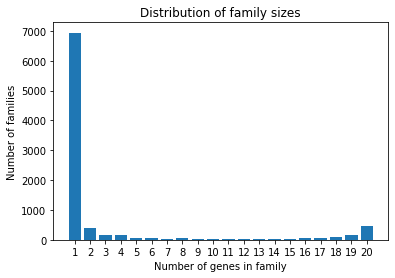

In [166]:
fig, ax=matplotlib.pyplot.subplots()
bar=ax.bar(list(range(1,21)),f.family_lengths(pillars))
ax.set_xticks(list(range(1,21)));
ax.set_xlabel("Number of genes in family");
ax.set_ylabel("Number of families");
ax.set_title("Distribution of family sizes");

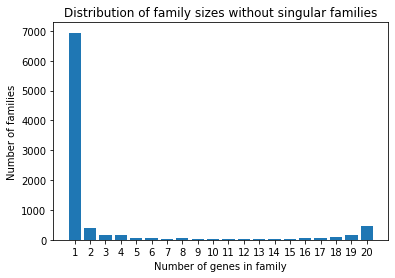

In [167]:
new = {key: pillars[key]  for key in pillars.keys() if len(pillars[key]['genes'])>1}
new=f.pillar_resort(species,pillars,1)
lengths=f.family_lengths(new)


fig, ax=matplotlib.pyplot.subplots()
bar=ax.bar(list(range(1,21)),lengths)
ax.set_xticks(list(range(1,21)));
ax.set_xlabel("Number of genes in family");
ax.set_ylabel("Number of families");
ax.set_title("Distribution of family sizes without singular families");

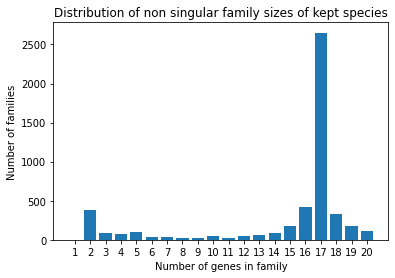

In [172]:
new = f.pillar_resort(species_keep,pillars,2)
lengths=f.family_lengths(new)

fig, ax=matplotlib.pyplot.subplots()
bar=ax.bar(list(range(1,21)),lengths)
ax.set_xticks(list(range(1,21)));
ax.set_xlabel("Number of genes in family");
ax.set_ylabel("Number of families");
ax.set_title("Distribution of non singular family sizes of kept species");

In [174]:
print(len(f.pillar_resort(species,pillars,17)))
print(len(f.pillar_resort(species_keep,pillars,17)))

4484
3783


The following plot shows the fragmentation, number of different segments (chromosome/contig/scaffolds).

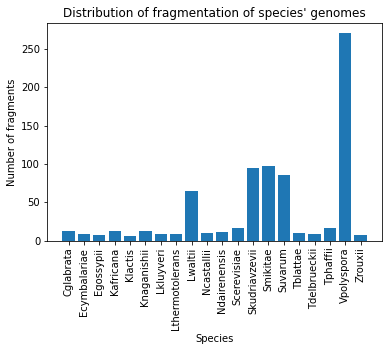

In [104]:
fragmentation=f.species_fragmentation(species)

fig, ax=matplotlib.pyplot.subplots()

matplotlib.pyplot.xticks(rotation=90)

bar=ax.bar(list(range(len(species))),fragmentation,tick_label=specie_names)
ax.set_xlabel("Species");
ax.set_ylabel("Number of fragments");
ax.set_title("Distribution of fragmentation of species' genomes");


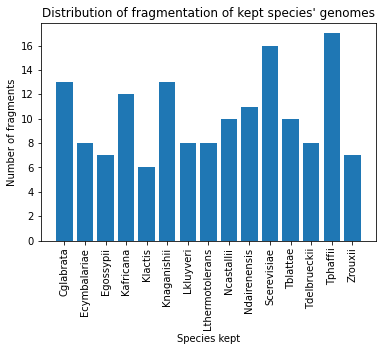

In [107]:
fragmentation=f.species_fragmentation(species_keep)

fig, ax=matplotlib.pyplot.subplots()
matplotlib.pyplot.xticks(rotation=90)
bar=ax.bar(list(range(len(species_keep))),fragmentation,tick_label=specie_keep_names)
ax.set_xlabel("Species kept");
ax.set_ylabel("Number of fragments");
ax.set_title("Distribution of fragmentation of kept species' genomes");

The following plot shows for each specie the number of non singular families that contain a gene from the given specie.

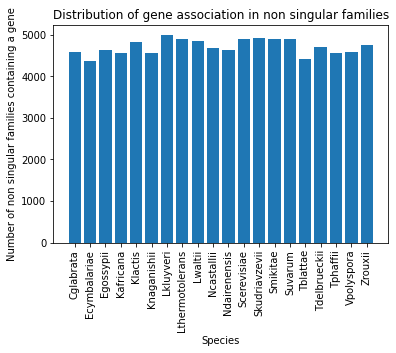

In [37]:
associations=f.species_associations(species,pillars)

fig, ax=matplotlib.pyplot.subplots()
matplotlib.pyplot.xticks(rotation=90)
bar=ax.bar(list(range(len(species))),associations,tick_label=specie_names)
ax.set_xlabel("Species");
ax.set_ylabel("Number of non singular families containing a gene");
ax.set_title("Distribution of gene association in non singular families");




## Info on species pairs

The following plot shows how many gene pairs each specie has with Saccharomyces Cerevisia.

Pairs are counted as the number of families with a gene from each species, if there are two copies from each then that is counted as 2 families and same for 3 and so on. If there is only 1 gene from one specie and 2 from the other in the family this only counts as one pair. 

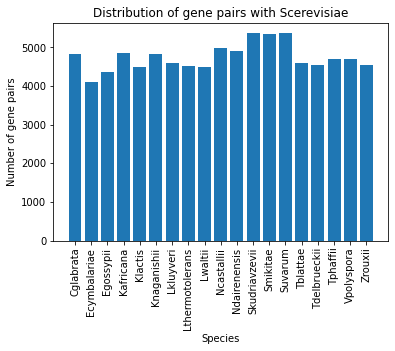

In [38]:
new=deepcopy(species)
new.pop(specie_names.index("Scerevisiae"))
Scer_matches=[f.species_pairs(x,Scerevisiae,pillars) for x in new]
names=deepcopy(specie_names)
ind=specie_names.index("Scerevisiae")
names.pop(ind)


fig, ax=matplotlib.pyplot.subplots()
matplotlib.pyplot.xticks(rotation=90)
bar=ax.bar(list(range(len(names))),Scer_matches,tick_label=names)
ax.set_xlabel("Species");
ax.set_ylabel("Number of gene pairs");
ax.set_title("Distribution of gene pairs with Scerevisiae");




### Matches Table
The following table shows the number of families in which both species have a gene, in the case that a family has two genes from each species this is counted as two families seeing as when families are reconcilled they will end up as two distinct families. When we have the same species the value represents the number of families in which we have more than one gene from the associated species.

In [39]:
data = f.match_matrix(species,pillars)
 
df = pd.DataFrame(data, index=specie_names)
 
df

Cglabrata  Ecymbalariae  Egossypii  Kafricana  Klactis  \
Cglabrata              393          4041       4303       4704     4434   
Ecymbalariae          4041             0       4272       4010     4190   
Egossypii             4303          4272          0       4264     4458   
Kafricana             4704          4010       4264        504     4396   
Klactis               4434          4190       4458       4396        0   
Knaganishii           4701          4012       4270       4824     4417   
Lkluyveri             4505          4270       4551       4477     4737   
Lthermotolerans       4439          4186       4468       4401     4639   
Lwaltii               4406          4145       4415       4360     4606   
Ncastallii            4789          4069       4332       4861     4478   
Ndairenensis          4731          4042       4299       4806     4428   
Scerevisiae           4843          4094       4358       4849     4501   
Skudriavzevii         4830          4085       4348       4833     4481   
Smikitae              4831          4086       4351       4843     4488   
Suvarum               4846          4093       4358       4850     4498   
Tblattae              4527          3953       4207       4521     4309   
Tdelbrueckii          4466          4115       4386       4431     4532   
Tphaffii              4618          4034       4298       4599     4412   
Vpolyspora            4609          4036       4297       4600     4424   
Zrouxii               4468          4137       4409       4433     4564   

                 Knaganishii  Lkluyveri  Lthermotolerans  Lwaltii  Ncastallii  \
Cglabrata               4701       4505             4439     4406        4789   
Ecymbalariae            4012       4270             4186     4145        4069   
Egossypii               4270       4551             4468     4415        4332   
Kafricana               4824       4477             4401     4360        4861   
Klactis                 4417       4737             4639     4606        4478   
Knaganishii              457       4493             4420     4378        4871   
Lkluyveri               4493          0             4787     4724        4560   
Lthermotolerans         4420       4787                0     4794        4488   
Lwaltii                 4378       4724             4794        0        4444   
Ncastallii              4871       4560             4488     4444         596   
Ndairenensis            4802       4512             4439     4396        5108   
Scerevisiae             4835       4597             4527     4490        4990   
Skudriavzevii           4817       4583             4510     4476        4962   
Smikitae                4830       4588             4515     4475        4970   
Suvarum                 4838       4595             4524     4486        4990   
Tblattae                4499       4381             4315     4277        4595   
Tdelbrueckii            4445       4647             4578     4532        4507   
Tphaffii                4593       4497             4429     4388        4683   
Vpolyspora              4584       4506             4436     4392        4693   
Zrouxii                 4449       4677             4599     4552        4512   

                 Ndairenensis  Scerevisiae  Skudriavzevii  Smikitae  Suvarum  \
Cglabrata                4731         4843           4830      4831     4846   
Ecymbalariae             4042         4094           4085      4086     4093   
Egossypii                4299         4358           4348      4351     4358   
Kafricana                4806         4849           4833      4843     4850   
Klactis                  4428         4501           4481      4488     4498   
Knaganishii              4802         4835           4817      4830     4838   
Lkluyveri                4512         4597           4583      4588     4595   
Lthermotolerans          4439         4527           4510      4515     4524   
Lwaltii            

The following is an example of how the group_pairs function can take in a list of species and return the number of pairs that would be in a reconcilled family assignment. The line bellow it is a verification using the above table to manually calculate the sum.

In [42]:
f.group_pairs([Scerevisiae, Smikitae, Zrouxii],pillars)

14451

In [44]:
5358+4551+4542

14451

In [47]:
f.gene_species_mapping([Scerevisiae, Smikitae])

'Done'